In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

C:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [43]:
from sklearn.tree import DecisionTreeClassifier

In [3]:
# Gathering all training data
trainingData = pd.read_csv('D:/DataScience-master/Kaggle/housePricePredictionAnalysis/train.csv')
trainingData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Stroing target data from training dataset into trainingTarget
trainingTarget = trainingData['SalePrice'].copy()

# Storing all features into the trainingFeatures from target
trainingFeatures = trainingData.drop(['SalePrice'],axis=1)

In [6]:
# Cleaning Data by replacing data with either mean, median or mode.
trainingFeatures['LotFrontage'].fillna(np.mean(trainingFeatures['LotFrontage']),inplace=True)
trainingFeatures.drop(['Alley'],axis=1,inplace=True)
trainingFeatures['BsmtQual'].fillna(trainingFeatures['BsmtQual'].mode()[0],inplace=True)
trainingFeatures['MasVnrType'].fillna('None',inplace=True)
trainingFeatures['MasVnrArea'].fillna(0.0,inplace=True)
trainingFeatures['FireplaceQu'].fillna('NA',inplace=True)        #putting a value which is not the mode of the column.
trainingFeatures['GarageType'].fillna(trainingFeatures['GarageType'].mode()[0],inplace=True)
trainingFeatures['GarageYrBlt'].fillna(trainingFeatures['GarageYrBlt'].median(),inplace=True)
trainingFeatures['GarageFinish'].fillna(trainingFeatures['GarageFinish'].mode()[0],inplace=True)
trainingFeatures['GarageQual'].fillna(trainingFeatures['GarageQual'].mode()[0],inplace=True)
trainingFeatures['GarageCond'].fillna(trainingFeatures['GarageCond'].mode()[0],inplace=True)

In [37]:
# Dropping some columns as there are more then 1400 NaN values out of 1460
trainingFeatures.drop(['PoolQC'],axis=1,inplace=True)
trainingFeatures.drop(['Fence'],axis=1,inplace=True)
trainingFeatures.drop(['MiscFeature'],axis=1,inplace=True)

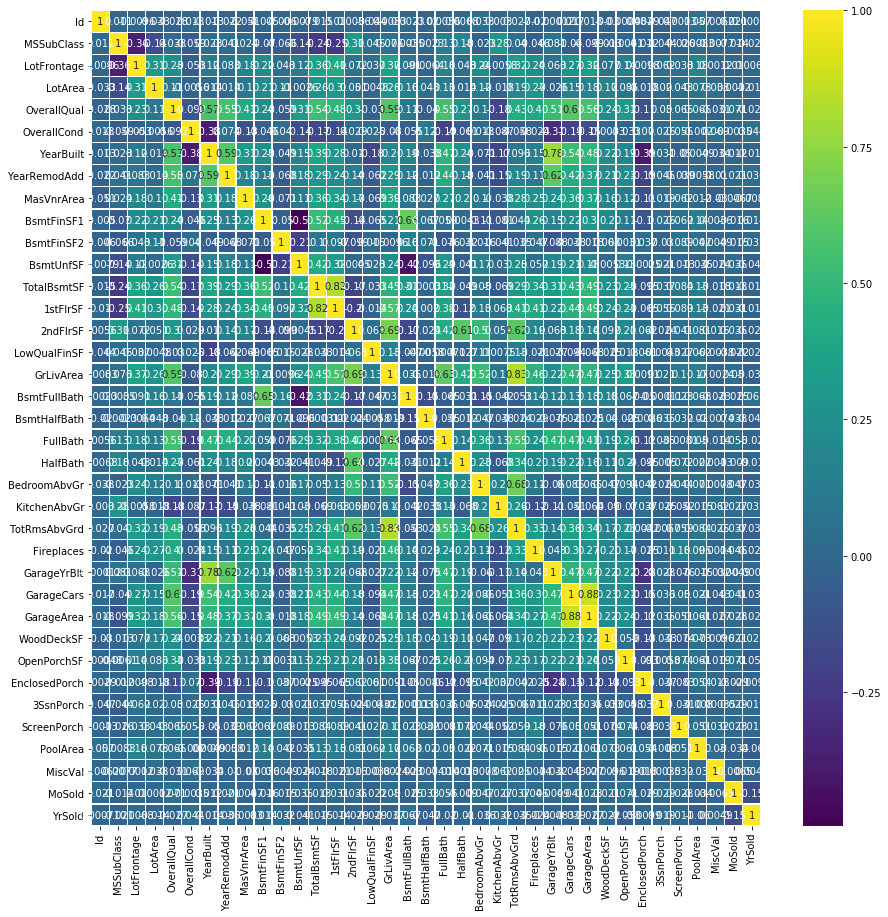

In [41]:
# Plotting corelation matrix
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(trainingFeatures.corr(),cmap='viridis',annot=True,linewidths=0.5,ax=ax)

In [ ]:

"""
First convert the categorical data into numerical using one hot encoding technique.
We use label encoding in case of Gender where there are only binary classes such as male and female.
One hot encoding must me used when a column has more then 3 classes.

We must avoid label encoding because the label encoding will start giving priority to the 1,2,3..... labelled data,
as the priority is not required.
Hence we prefer one hot encoding, but one hot encoding drastically increases the features.

"""